In [1]:
import turicreate as tc

# Regression using house price data

In [2]:
#reading data
sf=tc.SFrame('home_data2.sframe')

In [3]:
sf

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Visualization

In [158]:
#general overall summary of house
sf.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [159]:
#2d plot
tc.show(sf[1:5000]['bedrooms'],sf[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Regression starts here

In [160]:
train_set, test_set = sf.random_split(.7,seed=0)

 ### First, we build a simple linear model for predicting house price

In [161]:
model1 = tc.linear_regression.create(train_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 14464

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002329     | 4344737.049755     | 2672292.405082       | 262271.546953                   | 287619.333709                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

#### Evaluation of model

In [162]:
print (model1.evaluate(test_set))

{'max_error': 4139629.760939038, 'rmse': 256241.6066753073}


In [163]:
print (model1.predict(test_set))

[170267.68072872062, 356623.786923817, 463919.7268543271, 785807.5466458573, 435683.9531884034, 644628.6783162388, 382035.98322314833, 678511.6067153472, 607922.172550538, 260622.15645967645, 692629.4935483091, 678511.6067153472, 1144401.8722030881, 599451.4404507609, 842279.0939777046, 588157.1309843913, 308622.97169174673, 387683.1379563331, 421566.0663554415, 856396.9808106665, 729335.9993140098, 458272.57212114235, 449801.8400213652, 926986.4149754758, 616392.9046503151, 489331.9231536584, 511920.5420863974, 506273.3873532126, 463919.7268543271, 511920.5420863974, 526038.4289193592, 605098.5951839456, 308622.97169174673, 864867.7129104437, 774513.2371794877, 729335.9993140098, 545803.4704855058, 520391.2741861745, 523214.85155276686, 684158.7614485319, 283210.7753924154, 749101.0408801564, 252151.4243598993, 672864.4519821624, 305799.39432515437, 1070988.8606716867, 449801.8400213652, 534509.1610191363, 523214.85155276686, 709570.9577478633, 339682.3227242628, 393330.29268951784, 1

In [164]:
a1=tc.SArray(data=model1.predict(test_set))
a1=a1.astype(dtype=int)

In [165]:
a2=tc.SArray(test_set['price'])

In [166]:
import pandas as pd

In [167]:
data = {'predicted value':a1, 'real value':a2} 

In [168]:
z=tc.SFrame(pd.DataFrame(data))

In [169]:
z

predicted value,real value
170267,180000.0
356623,310000.0
463919,530000.0
785807,650000.0
435683,233000.0
644628,937000.0
382035,438000.0
678511,719000.0
607922,580500.0
260622,535000.0


### Finding Coefficients and plots

In [170]:
model1.coefficients

name,index,value,stderr
(intercept),None,-47147.77649889188,5424.033512042612
sqft_living,None,282.357736659237,2.3882249630796886


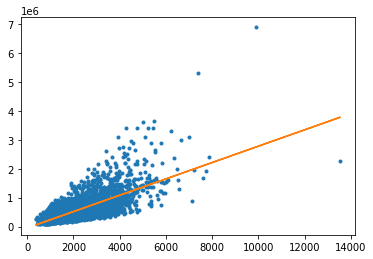

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],model1.predict(test_set),'-')

## Application of Multiple independent features(Multiple Regression)

In [172]:
x=['sqft_living','sqft_above','sqft_lot15','bedrooms','bathrooms','zipcode','sqft_lot','floors','sqft_living15','sqft_basement','condition','view','waterfront']

In [173]:
sf[x].show()

Materializing SFrame

In [174]:
tc.show(sf['zipcode'],sf['price'])

Materializing X axis SArray

Materializing Y axis SArray

In [175]:
model2 = tc.linear_regression.create(train_set,target='price',features=x)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 14464

Number of features          : 13

Number of unpacked features : 13

Number of coefficients    : 82

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.023688     | 4178600.542341     | 1337525.673371       | 167882.946922                   | 152657.411699                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

### Comparison of both models

In [176]:
print (model1.evaluate(test_set))
print (model2.evaluate(test_set))

{'max_error': 4139629.760939038, 'rmse': 256241.6066753073}
{'max_error': 2981520.8178053973, 'rmse': 160058.4628430774}


### Evaluation of performance of model2

In [178]:
p2=model2.predict(test_set)
p2

dtype: float
Rows: 6387
[178682.9357401917, 297125.6001987762, 586685.3475462195, 856617.1359622212, 303562.7117487807, 883882.7356156, 496622.71067785623, 684410.9854579432, 589505.4366305749, 437349.85863048513, 553340.9438481427, 636411.8500846816, 811370.4894599546, 665497.3419247238, 558699.7514651271, 350516.8881001426, 218314.15216812034, 480340.34200244606, 584678.8350025729, 1280712.6778800655, 702510.1480480294, 276338.8433345523, 415264.0576471605, 751321.5046813254, 432442.6677463186, 264466.9727799732, 248112.0287081885, 348701.18215027126, 287882.51650850475, 642796.175169578, 511010.3735056281, 534218.4663032986, 508023.80154549005, 732130.4499761603, 805994.0073088213, 1267171.5311683607, 520134.78764027474, 475470.9048379115, 200970.52386022685, 483563.9050975151, 422630.7283378936, 726983.7820901551, 269492.98476019525, 919681.8922518302, 148424.81144559503, 746604.5765753012, 340058.8530077804, 279263.4046466558, 460650.72491231235, 785505.1411423931, 424386.85240201

In [179]:
a3=tc.SArray(data=model2.predict(test_set))
a3=a3.astype(dtype=int)

In [180]:
data2 = {'predicted value':a3, 'real value':a2}

In [181]:
z2=tc.SFrame(pd.DataFrame(data2))

In [182]:
z2

predicted value,real value
178682,180000.0
297125,310000.0
586685,530000.0
856617,650000.0
303562,233000.0
883882,937000.0
496622,438000.0
684410,719000.0
589505,580500.0
437349,535000.0


## Prediction of a particular house

In [206]:
h1=sf[sf['id']=='1321400060']

In [207]:
h1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
	[]

In [203]:
print (h1['price'])

[221900.0, 538000.0, 180000.0, 604000.0, 510000.0, 1225000.0, 257500.0, 291850.0, 229500.0, 323000.0, 662500.0, 468000.0, 310000.0, 400000.0, 530000.0, 650000.0, 395000.0, 485000.0, 189000.0, 230000.0, 385000.0, 2000000.0, 285000.0, 252700.0, 329000.0, 233000.0, 937000.0, 667000.0, 438000.0, 719000.0, 580500.0, 280000.0, 687500.0, 535000.0, 322500.0, 696000.0, 550000.0, 640000.0, 240000.0, 605000.0, 625000.0, 775000.0, 861990.0, 685000.0, 309000.0, 488000.0, 210490.0, 785000.0, 450000.0, 1350000.0, 228000.0, 345000.0, 600000.0, 585000.0, 920000.0, 885000.0, 292500.0, 301000.0, 951000.0, 430000.0, 650000.0, 289000.0, 505000.0, 549000.0, 425000.0, 317625.0, 975000.0, 287000.0, 204000.0, 1325000.0, 1040000.0, 325000.0, 571000.0, 360000.0, 349000.0, 832500.0, 380000.0, 480000.0, 410000.0, 720000.0, 390000.0, 360000.0, 355000.0, 356000.0, 315000.0, 940000.0, 305000.0, 461000.0, 215000.0, 335000.0, 243500.0, 1099880.0, 153000.0, 430000.0, 700000.0, 905000.0, 247500.0, 199000.0, 314000.0, 437

In [204]:
print (model1.predict(h1))

[286034.3527590078, 678511.6067153472, 170267.68072872062, 506273.3873532126, 427213.22108862625, 1483231.1561941726, 437095.7418716996, 252151.4243598993, 455448.99475455, 486508.34578706603, 958045.7660079919, 280387.19802582305, 356623.786923817, 339682.3227242628, 463919.7268543271, 785807.5466458573, 486508.34578706603, 404624.6021558873, 291681.5074921925, 305799.39432515437, 410271.7568890721, 814043.3203117809, 593804.285717576, 254975.00172649173, 644628.6783162388, 435683.9531884034, 644628.6783162388, 348153.0548240399, 382035.98322314833, 678511.6067153472, 607922.172550538, 288857.93012560013, 610745.7499171303, 260622.15645967645, 534509.1610191363, 602275.0178173532, 421566.0663554415, 619216.4820169074, 297328.6622253772, 692629.4935483091, 678511.6067153472, 1144401.8722030881, 967928.2867910651, 396153.8700561102, 314270.12642493146, 845102.671344297, 232386.38279375277, 599451.4404507609, 305799.39432515437, 730183.0725239875, 288857.93012560013, 842279.0939777046, 3

In [205]:
print (model2.predict(h1))

[138897.72720785084, 632123.5839606208, 178682.9357401917, 558873.5003271459, 458016.3426418337, 1382789.1222986837, 240453.24234913674, 85960.66610890042, 297874.5856407725, 312153.30218169594, 866193.1631223069, 487548.60787388636, 297125.6001987762, 386822.7887970394, 586685.3475462195, 856617.1359622212, 347386.0179851181, 553408.8155193918, 178001.16871816912, 138465.55128608248, 327813.8255913728, 1420994.2011557529, 280712.8546555595, 104830.90930385984, 455302.11719037814, 303562.7117487807, 883882.7356156, 853301.9114229409, 496622.71067785623, 684410.9854579432, 589505.4366305749, 233354.10347560002, 658323.748501699, 437349.85863048513, 304620.8559732649, 692420.1079235448, 314592.8773720069, 781999.3325173401, 4012.648120726066, 553340.9438481427, 636411.8500846816, 811370.4894599546, 888239.0565391498, 701388.9195838416, 145324.4899209696, 726331.0709281914, 14427.495730911818, 665497.3419247238, 516931.9952334496, 1330453.9289135525, 177533.7736606687, 558699.7514651271, 

<img src=house-2008000270.png>

#### Finding mean house price of a particular neighbourhood

In [127]:
z=sf[sf['zipcode']==98039]

In [128]:
z

No.,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
2975,3625049014,20140829T000000,2950000,4,3.5,4860,23885,2.0,0
3762,2540700110,20150212T000000,1905000,4,3.5,4210,18564,2.0,0
4078,3262300940,20141107T000000,875000,3,1.0,1220,8119,1.0,0
4079,3262300940,20150210T000000,940000,3,1.0,1220,8119,1.0,0
4150,6447300265,20141014T000000,4000000,4,5.5,7080,16573,2.0,0
4412,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0
4792,2210500019,20150324T000000,937500,3,1.0,1320,8500,1.0,0
5179,6447300345,20150406T000000,1160000,4,3.0,2680,15438,2.0,0
5590,6447300225,20141106T000000,1880000,3,2.75,2620,17919,1.0,0
5881,2525049148,20141007T000000,3418800,5,5.0,5450,20412,2.0,0


In [129]:
z['price'].mean()

2160606.5999999996

### Finding fraction of houses of square feet of living space >=2000 sqft but <4000 sqft

In [87]:
z=sf[sf['sqft_living']>2000]

In [88]:
z=z[z['sqft_living']<4000]

In [89]:
z

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0
1736800520,20150403T000000,662500,3,2.5,3560,9796,1.0,0,0
9297300055,20150124T000000,650000,4,3.0,2950,5000,2.0,0,3
2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4
7137970340,20140703T000000,285000,5,2.5,2270,6300,2.0,0,0
3814700200,20141120T000000,329000,3,2.25,2450,6500,2.0,0,0
1794500383,20140626T000000,937000,3,1.75,2450,2691,2.0,0,0
1873100390,20150302T000000,719000,4,2.5,2570,7173,2.0,0,0
8562750320,20141110T000000,580500,3,2.5,2320,3980,2.0,0,0
461000390,20140624T000000,687500,4,1.75,2330,5000,1.5,0,0


In [90]:
z=z.add_row_number(column_name='No.', start=1)

In [96]:
f1=z['No.'].tail(1)

In [93]:
sf=sf.add_row_number(column_name='No.', start=1)

In [97]:
f2=sf['No.'].tail(1)

In [98]:
f=f1/f2

In [99]:
f

dtype: float
Rows: 1
[0.4215518437977143]

### Finding predictions with new set of Features

In [6]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [7]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [8]:
train_data, test_data = sf.random_split(.8,seed=0)

In [9]:
model3 = tc.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.043811     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [10]:
model4 = tc.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.027989     | 4336058.938754     | 162392.982703                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

#### Find difference in errors amongst two models

In [11]:
e1=model3.evaluate(test_data)
e1

{'max_error': 3152242.7848689733, 'rmse': 180439.07296639978}

In [12]:
e2=model4.evaluate(test_data)
e2

{'max_error': 3170363.1813858226, 'rmse': 155269.6579282571}

In [13]:
e=e1['rmse']-e2['rmse']

In [14]:
e

25169.415038142673